### Project

# Bike store sales


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
sales = pd.read_csv('data/sales_data.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First look at our data

Analyze what columns we have, what type they are and what data is on them.

In [32]:
sales.shape

(5000, 16)

In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [34]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [35]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


### Fixing column types

- Cast `Date` to `datetime`.
- Cast `Customer_Gender`, `Country`, `State`, `Product_Category` and `Sub_Category` to `category`.

In [36]:
# this does not work: sales['Date'].astype('datetime')

sales['Date'] = pd.to_datetime(sales['Date'])

In [37]:
sales['Customer_Gender'] = sales['Customer_Gender'].astype('category')
sales['Country'] = sales['Country'].astype('category')
sales['State'] = sales['State'].astype('category')
sales['Product_Category'] = sales['Product_Category'].astype('category')
sales['Sub_Category'] = sales['Sub_Category'].astype('category')

In [38]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5000 non-null   datetime64[ns]
 1   Day               5000 non-null   int64         
 2   Month             5000 non-null   object        
 3   Year              5000 non-null   int64         
 4   Customer_Age      5000 non-null   int64         
 5   Customer_Gender   5000 non-null   category      
 6   Country           5000 non-null   category      
 7   State             5000 non-null   category      
 8   Product_Category  5000 non-null   category      
 9   Sub_Category      5000 non-null   category      
 10  Product           5000 non-null   object        
 11  Order_Quantity    5000 non-null   int64         
 12  Unit_Cost         5000 non-null   int64         
 13  Unit_Price        5000 non-null   int64         
 14  Profit            5000 n

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Summary statistics of the data

In [39]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [40]:
sales['Customer_Age'].mean()

35.9338

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [41]:
sales['Order_Quantity'].mean()

11.8204

Plotting <b>histogram</b> and <b>boxplot</b> of the `Order Quantity` data

<AxesSubplot:ylabel='Frequency'>

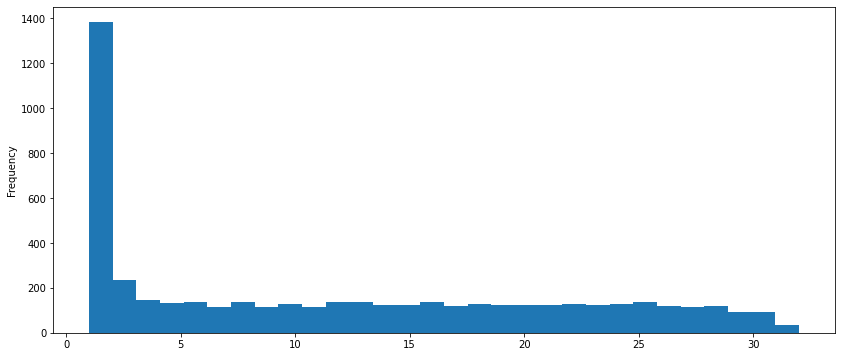

In [42]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

<AxesSubplot:>

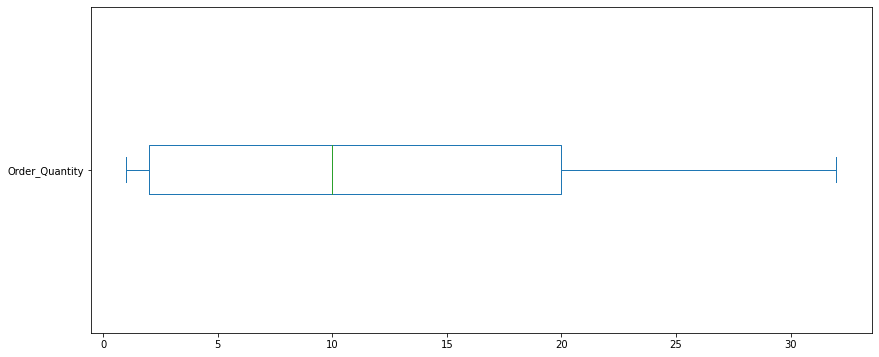

In [43]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### In which countries were sales made?

In [44]:
sales.Country.unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort sales by year

Older sales should be at the bottom.

In [45]:
sales.sort_values(['Year'], inplace=True, ascending=False)

In [46]:
sales.head(3)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
3962,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
3902,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5,46,78
3886,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,268,437


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Resetting the current index

I will not keep the old index.

In [47]:
sales.reset_index(drop=True)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
1,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5,46,78
2,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,268,437
3,2016-01-18,18,January,2016,26,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,4
4,2016-06-03,3,June,2016,44,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",18,13,35,390,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2011-03-01,1,March,2011,42,F,Germany,Saarland,Bikes,Road Bikes,"Road-750 Black, 52",1,344,540,99,443
4996,2011-12-05,5,December,2011,48,M,Canada,British Columbia,Bikes,Road Bikes,"Road-750 Black, 48",2,344,540,381,1069
4997,2011-07-30,30,July,2011,31,M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1008,2274
4998,2011-12-12,12,December,2011,35,F,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,567,1833


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [48]:
sales['Year'].value_counts()

2014    1327
2016    1272
2015    1123
2013    1040
2011     126
2012     112
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

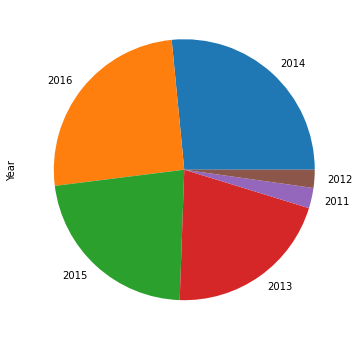

In [49]:
sales['Year'].value_counts().plot(kind='pie', figsize=(10,6))

### How many orders were sold per year

In [50]:
sales_year_ordqty = sales[['Year', 'Order_Quantity']]
sales_year_ordqty.groupby('Year').sum()


,Order_Quantity
Year,
2011,235
2012,224
2013,11949
2014,17269
2015,13607
2016,15818


Go ahead and show a <b>pie plot</b> and a <b>bar plot</b> with the previous data:

In [51]:
# your code goes here


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `Cost` column

This column should be:
$$ Cost = Unit\_Cost * Order\_Quantity $$

In [52]:
sales['Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### I will create a new `YearMonth` column

This new `YearMonth` column will be the concatenation of `Year` and `Month` columns, separated by a '-'.

In [53]:
# your code goes here
sales['YearMonth'] = sales['Year'].astype('str') + '-' + sales['Month']
#sales['Month'].dtype

In [54]:
sales.head(3)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
3962,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858,325,2016-July
3902,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5,46,78,32,2016-May
3886,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,268,437,169,2016-March


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Count how many sales we have per `YearMonth`.

In [55]:
sales['YearMonth'].value_counts()

2015-December    232
2016-April       218
2014-June        215
2013-December    215
2016-May         214
                ... 
2012-December      7
2012-February      6
2011-February      6
2011-June          6
2012-March         4
Name: YearMonth, Length: 62, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

<AxesSubplot:>

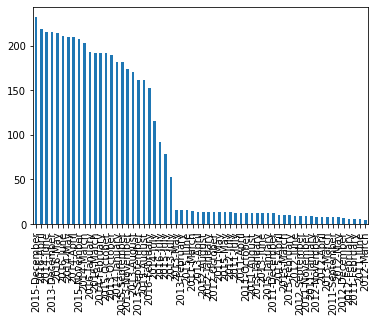

In [56]:
sales['YearMonth'].value_counts().plot(kind='bar')


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [57]:
#sales[['Country', 'Order_Quantity']].groupby('Country').sum().sort_values(by='Order_Quantity', ascending=False)
sales['Country'].value_counts()

United States     1700
Australia         1066
Canada             657
United Kingdom     604
France             489
Germany            484
Name: Country, dtype: int64

Show a <b>bar plot</b> of the sales per country:

<AxesSubplot:>

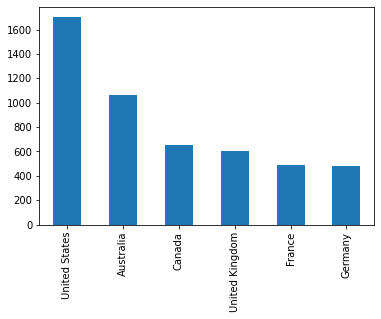

In [58]:
%matplotlib inline

#df = sales[['Country', 'Order_Quantity']].groupby('Country').sum().sort_values(by='Order_Quantity', ascending=False)
#df.plot(kind='bar')

sales['Country'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a list of every product sold

In [59]:
unique_prod_list = sales['Product'].unique
unique_prod_list

<bound method Series.unique of 3962      Sport-100 Helmet, Red
3902      Water Bottle - 30 oz.
3886     Sport-100 Helmet, Blue
3888      Water Bottle - 30 oz.
1571    Sport-100 Helmet, Black
                 ...           
3876         Road-750 Black, 52
426          Road-750 Black, 48
4890    Mountain-200 Silver, 38
2322    Mountain-200 Silver, 42
3282         Road-250 Black, 52
Name: Product, Length: 5000, dtype: object>

Create a **bar plot** showing the 10 most sold products (best sellers):

In [60]:
most_sold_prod_10 = sales[['Product', 'Order_Quantity']].groupby('Product').sum().sort_values(by='Order_Quantity',ascending=False).head(10)

<AxesSubplot:xlabel='Product', ylabel='Order_Quantity'>

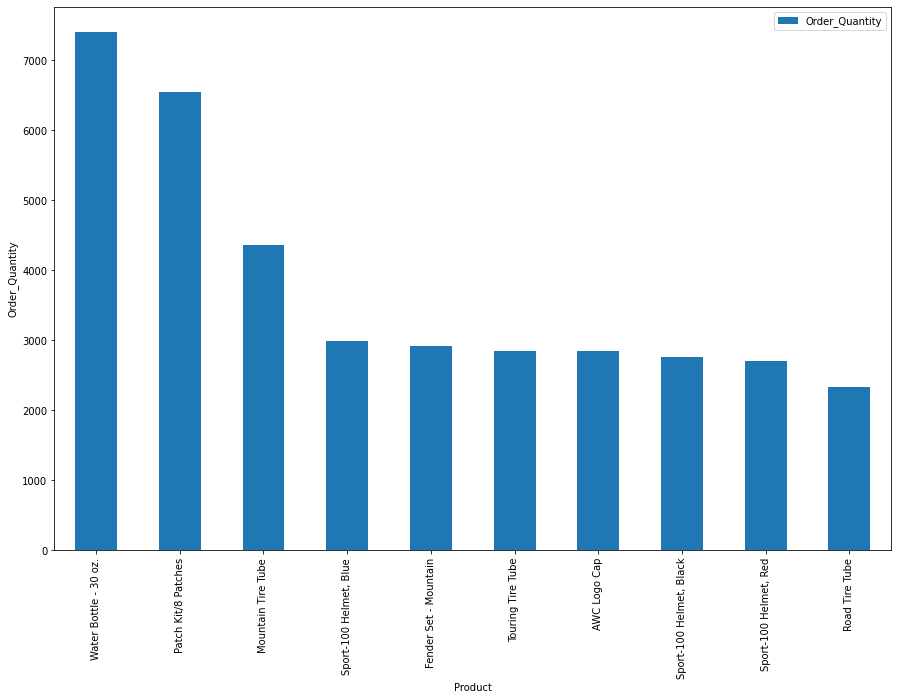

In [61]:
%matplotlib inline 
most_sold_prod_10.plot(kind='bar', figsize=(15,10), ylabel='Order_Quantity')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking for any relationship between `Unit_Cost` and `Unit_Price` using a scatter plot

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

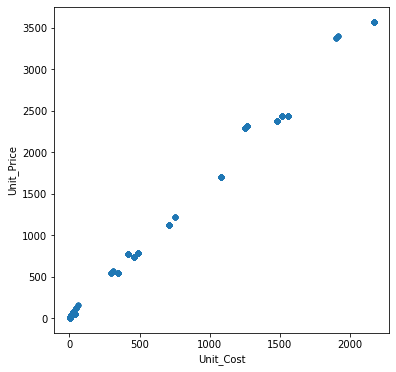

In [62]:
sales.plot(kind='scatter', x ='Unit_Cost', y ='Unit_Price', figsize=(6,6))

The plot above shows a very strong positive relationship between unit price and unit cost

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

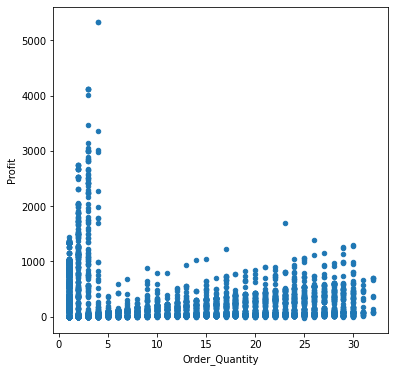

In [63]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

The plot above shows a no relationship between profit and order quanity

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

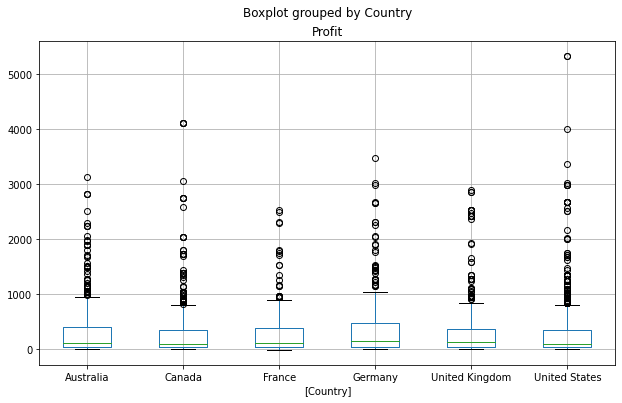

In [64]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking for any relationship between the `Customer_Age` per `Country` using a boxplot

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

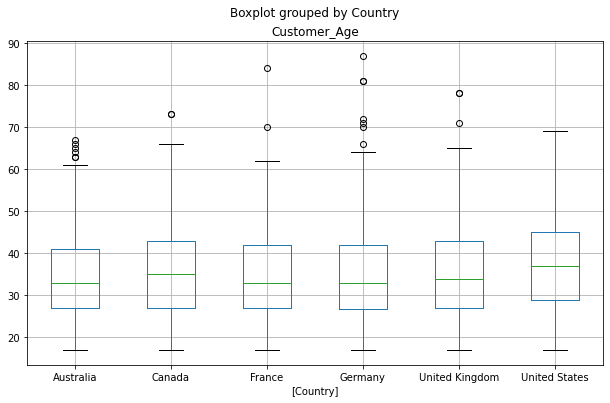

In [65]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [66]:
# your code goes here
sales['Revenue'] += 50

In [67]:
sales[['Product', 'Revenue']].head()

,Product,Revenue
3962,"Sport-100 Helmet, Red",908
3902,Water Bottle - 30 oz.,128
3886,"Sport-100 Helmet, Blue",487
3888,Water Bottle - 30 oz.,54
1571,"Sport-100 Helmet, Black",674


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Number of orders were made in `Canada` or `France`

In [68]:
orders_per_country = sales[['Country', 'Order_Quantity']].groupby('Country').sum()
orders_per_country.loc[['Canada', 'France']]

,Order_Quantity
Country,
Canada,8942
France,5513


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [69]:
#sales3 = sales[['Product', 'Sub_Category', 'Country', 'Order_Quantity']]
#sales3[(sales3['Sub_Category'] =='Bike Racks') & (sales3['Country'] == 'Canada')]['Order_Quantity'].sum()

In [70]:
sales.loc[(sales['Sub_Category'] == 'Bike Racks') & (sales['Country'] == 'Canada')]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
1562,2015-11-11,11,November,2015,34,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1697,2782,1035,2015-November
625,2015-11-17,17,November,2015,29,F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,14,45,120,1033,1713,630,2015-November
2401,2014-03-10,10,March,2014,43,F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,644,225,2014-March


In [71]:
#sales[sales['Product_Category'] == 'Accessories']
sales.loc[sales['Product'].str.contains('Bike')].head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
1567,2016-06-09,9,June,2016,37,F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,73,168,45,2016-June
1577,2016-02-18,18,February,2016,29,M,United Kingdom,England,Accessories,Cleaners,Bike Wash - Dissolver,21,3,8,98,211,63,2016-February
3652,2016-05-25,25,May,2016,20,F,Australia,New South Wales,Accessories,Cleaners,Bike Wash - Dissolver,28,3,8,111,245,84,2016-May
3763,2016-02-05,5,February,2016,47,M,United States,California,Accessories,Cleaners,Bike Wash - Dissolver,20,3,8,97,207,60,2016-February
4247,2016-05-21,21,May,2016,44,M,United Kingdom,England,Accessories,Cleaners,Bike Wash - Dissolver,8,3,8,37,111,24,2016-May


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [72]:
sales_france = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
sales_france


Seine (Paris)          101
Seine Saint Denis       87
Nord                    76
Yveline                 48
Hauts de Seine          41
Essonne                 40
Seine et Marne          16
Moselle                 16
Loiret                  13
Val d'Oise              11
Garonne (Haute)         10
Charente-Maritime       10
Pas de Calais            6
Val de Marne             5
Loir et Cher             5
Somme                    4
South Australia          0
Brandenburg              0
California               0
Tasmania                 0
Texas                    0
Saarland                 0
Utah                     0
Victoria                 0
Washington               0
British Columbia         0
Ohio                     0
Queensland               0
Oregon                   0
Nordrhein-Westfalen      0
Bayern                   0
New York                 0
New South Wales          0
Missouri                 0
Kentucky                 0
Hessen                   0
Hamburg                  0
G

Show the results with a <b>bar plot</b>:

<AxesSubplot:>

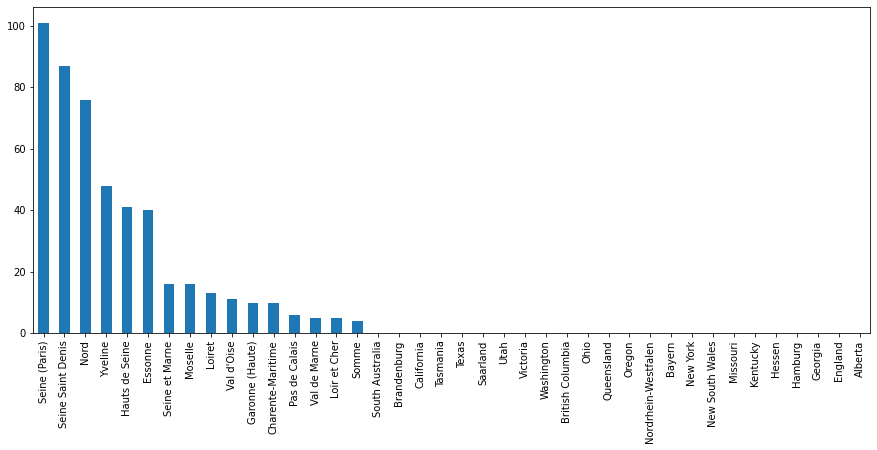

In [73]:
sales_france.plot(kind='bar', figsize=(15,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [74]:
sales[['Sub_Category', 'Order_Quantity']].groupby('Sub_Category').sum()

,Order_Quantity
Sub_Category,
Bike Racks,209
Bike Stands,55
Bottles and Cages,10712
Caps,2838
Cleaners,1295
...,...
Shorts,1324
Socks,697
Tires and Tubes,21713


Go ahead and show a <b>pie plot</b> with the results:

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [75]:
sales['Product_Category'].unique()

['Accessories', 'Bikes', 'Clothing']
Categories (3, object): ['Accessories', 'Bikes', 'Clothing']

In [76]:
acc_sub_cat = sales.loc[sales['Product_Category']=='Accessories', 'Sub_Category'].value_counts()
acc_sub_cat

Tires and Tubes      1458
Bottles and Cages     719
Helmets               553
Fenders               183
Cleaners               78
Hydration Packs        64
Bike Racks             26
Bike Stands             9
Gloves                  0
Jerseys                 0
Mountain Bikes          0
Road Bikes              0
Shorts                  0
Socks                   0
Caps                    0
Touring Bikes           0
Vests                   0
Name: Sub_Category, dtype: int64

Show the results with a <b>bar plot</b>:

<AxesSubplot:>

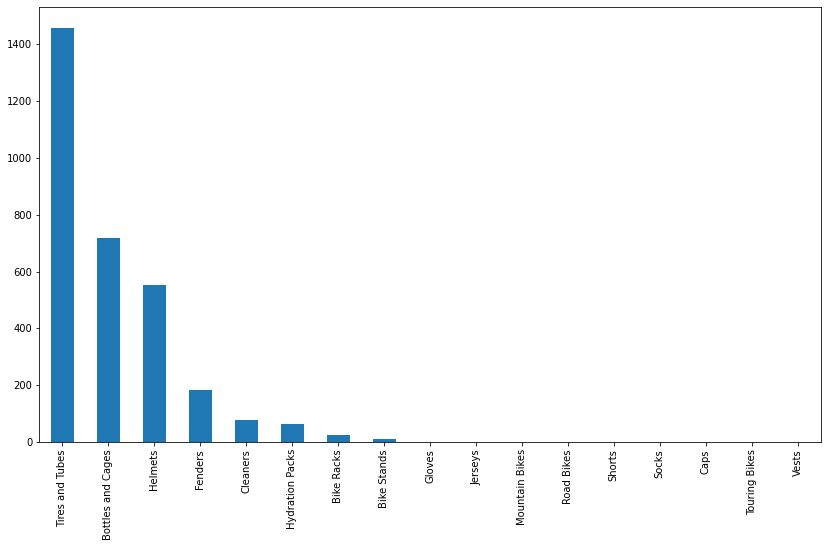

In [77]:
acc_sub_cat.plot(kind='bar', figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [78]:
orders_bike_subcat = sales.loc[sales['Product_Category']=='Bikes', 'Sub_Category'].value_counts()
orders_bike_subcat

Road Bikes           600
Mountain Bikes       391
Touring Bikes        175
Bike Racks             0
Jerseys                0
Tires and Tubes        0
Socks                  0
Shorts                 0
Hydration Packs        0
Bike Stands            0
Helmets                0
Gloves                 0
Fenders                0
Cleaners               0
Caps                   0
Bottles and Cages      0
Vests                  0
Name: Sub_Category, dtype: int64

Show the results with a <b>pie plot</b>:

<AxesSubplot:ylabel='Sub_Category'>

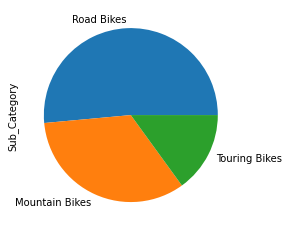

In [79]:
orders_bike_subcat.plot(kind='pie', fig=(12,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [80]:
sales['Customer_Gender'].value_counts()

M    2564
F    2436
Name: Customer_Gender, dtype: int64

<AxesSubplot:>

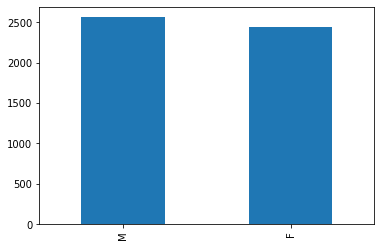

In [81]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

### Which gender sold the most quantity of items

In [82]:
sales[['Customer_Gender', 'Order_Quantity']].groupby('Customer_Gender').sum().sort_values(by='Order_Quantity')

,Order_Quantity
Customer_Gender,
F,28183
M,30919


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [83]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] > 500)].shape[0]

1058

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Top-5 sales with the highest revenue

In [84]:
sales[['Product', 'Revenue']].sort_values(by='Revenue', ascending=False).head(5)

,Product,Revenue
743,"Road-150 Red, 62",14076
2686,"Road-150 Red, 44",14076
1490,"Road-150 Red, 62",10677
3530,"Road-150 Red, 62",10677
2076,"Road-150 Red, 62",10677


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [85]:
rev_over_10k = sales[sales['Revenue'] > 10000]
rev_over_10k[['Order_Quantity']].mean()

Order_Quantity    3.25
dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [86]:
# your code goes here
rev_lt_10k = sales[sales['Revenue'] < 10000]
rev_lt_10k[['Order_Quantity']].mean()

Order_Quantity    11.834135
dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [87]:
sales[sales['YearMonth'] == '2016-May'].shape[0]

214

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [88]:
sales.loc[sales['YearMonth'].isin(['2016-May','2016-June', '2016-July'])].shape[0]

517

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [89]:
# your code goes here
sales['Unit_Price'].loc[sales['Country'] == 'United States'] += 0.072


C:\Users\Liz Egbuchulam\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [90]:
sales[['Unit_Price', 'Country']]

,Unit_Price,Country
3962,35.072,United States
3902,5.072,United States
3886,35.000,United Kingdom
3888,5.000,Australia
1571,35.000,Canada
...,...,...
3876,540.000,Germany
426,540.000,Canada
4890,2320.072,United States
2322,2320.000,Australia


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)